In [1]:
from google.colab import files
uploaded = files.upload()

Saving ForIvan_v2.xlsx to ForIvan_v2.xlsx


In [2]:
from google.colab import files
uploaded = files.upload()

Saving MasterTrainingData.xlsx to MasterTrainingData.xlsx


In [3]:
from google.colab import files
uploaded = files.upload()

Saving Prepped_PP56_Data.xlsx to Prepped_PP56_Data.xlsx


In [4]:
import pandas as pd
import numpy as np

#Import all data
data = pd.read_excel("MasterTrainingData.xlsx", sheet_name='Sheet1')
df= pd.DataFrame(data)
PP56_data= pd.read_excel("Prepped_PP56_Data.xlsx")
df3 = pd.DataFrame(PP56_data)
pp13b = pd.read_excel("ForIvan_v2.xlsx",sheet_name="Sheet1")

In [5]:
#Make sure all data is loaded from master training set
df['Assemblage'].value_counts()

Sandbath    2061
Unheated     783
Direct       405
Ember        261
Kiln          30
Name: Assemblage, dtype: int64

In [6]:
df1 = df
df1['Assemblage'].value_counts()

Sandbath    2061
Unheated     783
Direct       405
Ember        261
Kiln          30
Name: Assemblage, dtype: int64

In [7]:
#Clean the data to insure that all the types are correctlly labeled
df1 = df1[df1['Assemblage'].isin(['Unheated','Sandbath','Ember','Direct'])]

In [11]:
df1

,PlottedFind,Scan,Assemblage,Source,Treatment,L,A,B,400,410,...,610,620,630,640,650,660,670,680,690,700
0,D9.02.01B.21_EM_3,Scan3,Ember,D9,Heated,35.3318,6.2941,11.4943,0.060302,0.058517,...,0.113737,0.117236,0.118931,0.120261,0.121811,0.122694,0.123149,0.123382,0.124941,0.125273
1,D9.02.01B.21_EM_2,Scan2,Ember,D9,Heated,39.5810,6.7049,9.2102,0.083880,0.083499,...,0.142109,0.143794,0.144702,0.144891,0.146356,0.146531,0.146624,0.147172,0.147922,0.148207
2,D9.02.01B.21_EM_1,Scan1,Ember,D9,Heated,37.0960,6.1916,8.3717,0.078887,0.076247,...,0.122921,0.126527,0.127520,0.127196,0.127973,0.127804,0.127201,0.125817,0.124493,0.122990
3,D9.02.01B.25_EM_3,Scan3,Ember,D9,Heated,26.6245,5.3029,3.9132,0.050117,0.048243,...,0.064328,0.070718,0.070220,0.067402,0.064062,0.064777,0.067402,0.069492,0.071858,0.073544
4,D9.02.01B.25_EM_2,Scan2,Ember,D9,Heated,28.2648,4.5728,6.7805,0.043424,0.040812,...,0.071691,0.070814,0.069684,0.067824,0.068162,0.069882,0.073120,0.076106,0.079135,0.079003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,I14.02D.32,Scan 2,Sandbath,I14,Heated,31.5669,11.4111,9.2173,0.051874,0.049382,...,0.108905,0.113787,0.115267,0.115306,0.116170,0.117736,0.119951,0.123430,0.128211,0.132076
3536,I14.02D.32,Scan 1,Sandbath,I14,Heated,32.1847,11.4206,9.4312,0.053577,0.051425,...,0.113180,0.117535,0.119138,0.119514,0.120909,0.122560,0.124889,0.128495,0.133337,0.137537
3537,I14.02D.13,Scan 1,Sandbath,I14,Heated,27.1750,9.3496,7.5276,0.041299,0.039219,...,0.081004,0.085825,0.084462,0.081950,0.080368,0.084267,0.090290,0.094673,0.098816,0.098498
3538,I14.02D.13,Scan 2,Sandbath,I14,Heated,28.0869,9.5992,6.7274,0.045762,0.042531,...,0.083869,0.088854,0.089150,0.088984,0.088646,0.090023,0.091784,0.095696,0.101332,0.104685


In [8]:
#Prepare the real archeological site data to be run through the model
df2 = pp13b
df2 = df2.drop(['Date', 'Type','StratAgg'], axis=1)
df2 = df2[df2['Assemblage'] == 'PP13B']


In [13]:
df2

,PlottedFind,Scan,Assemblage,Source,Treatment,L,A,B,400,410,...,610,620,630,640,650,660,670,680,690,700
0,3,Scan3,PP13B,PP13B,PP13B,54.9325,5.2672,12.8918,0.134803,0.144809,...,0.272777,0.277434,0.283947,0.288101,0.290476,0.290397,0.288799,0.289472,0.290678,0.293403
1,3,Scan2,PP13B,PP13B,PP13B,54.9548,5.2614,12.9635,0.135189,0.145081,...,0.273888,0.277367,0.282515,0.286326,0.289665,0.291112,0.290466,0.291148,0.291853,0.293503
2,3,Scan1,PP13B,PP13B,PP13B,55.4779,5.4790,12.9116,0.138364,0.148899,...,0.279282,0.284154,0.291610,0.296595,0.299633,0.300036,0.298897,0.300005,0.301571,0.304589
3,23,Scan3,PP13B,PP13B,PP13B,60.0083,6.7267,14.3792,0.163687,0.176085,...,0.343595,0.348981,0.358139,0.365491,0.371450,0.374827,0.376420,0.379883,0.382915,0.387494
4,23,Scan2,PP13B,PP13B,PP13B,61.6878,6.4384,12.9326,0.184505,0.201275,...,0.365698,0.369214,0.374000,0.379077,0.385518,0.390429,0.392285,0.394837,0.395998,0.397932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,60637,Scan 2,PP13B,NaN,NaN,62.6731,2.8826,13.4372,0.179695,0.191145,...,0.359948,0.361686,0.366565,0.372351,0.383228,0.391033,0.393731,0.394981,0.394441,0.393515
1460,60637,Scan 1,PP13B,NaN,NaN,62.7300,2.9338,14.2996,0.172849,0.183079,...,0.364011,0.364990,0.369522,0.375341,0.386548,0.394694,0.397892,0.400002,0.400464,0.401225
1461,78300,Scan 3,PP13B,NaN,NaN,56.7684,2.3964,13.9798,0.137893,0.143843,...,0.282756,0.283713,0.285467,0.285514,0.288237,0.289686,0.288986,0.289494,0.289584,0.289423
1462,78300,Scan 2,PP13B,NaN,NaN,62.4578,2.3657,15.1320,0.167155,0.177504,...,0.351770,0.354060,0.357025,0.357869,0.362290,0.364254,0.363589,0.363399,0.361786,0.359841


In [9]:
#Created testing and trainging sets for the model
SC = df1
groupSC = SC.groupby(["PlottedFind","Assemblage"], as_index=False).mean()
X = groupSC.drop(['PlottedFind','Assemblage'], axis=1)
X.columns = X.columns.astype(str)
y = groupSC['Assemblage']

<ipython-input-9-fbdc3f61c976>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupSC = SC.groupby(["PlottedFind","Assemblage"], as_index=False).mean()


In [10]:
SC2 = df2
groupSC2 = SC2.groupby(["PlottedFind","Assemblage"], as_index=False).mean()
pp13b = groupSC2.drop(['PlottedFind','Assemblage'], axis=1)
pp13b.columns = pp13b.columns.astype(str)

<ipython-input-10-69aa36f27f1b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupSC2 = SC2.groupby(["PlottedFind","Assemblage"], as_index=False).mean()


In [11]:
SC3 = df3
groupSC3 = SC3.groupby(["PlottedFind","Assemblage"], as_index=False).mean()
pp56 = groupSC3.drop(['PlottedFind','Assemblage'], axis=1)
pp56.columns = pp56.columns.astype(str)
y2 = groupSC3["PlottedFind"]

<ipython-input-11-0be97b3200c9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupSC3 = SC3.groupby(["PlottedFind","Assemblage"], as_index=False).mean()


In [13]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42069, stratify=y)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf_model = RandomForestClassifier(n_estimators=26, random_state=42069)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=26, random_state=42069)

In [15]:
#Prediction for Pinicle Point 13B
y_pred1 = rf_model.predict(pp13b)

groupSC2['Assemblage'] = y_pred1

In [21]:
#Download File
groupSC2.to_excel("PP_13_B_Predictions.xlsx", index=False)
files.download("PP_13_B_Predictions.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
#Prediction for Pinicle Point 5-6
y_pred2 = rf_model.predict(pp56)

groupSC3['Assemblage'] = y_pred2


In [ ]:
#Download File
groupSC3.to_excel("PP_5-6_Predictions.xlsx", index=False)
files.download("PP_5-6_Predictions.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Sandbath    125
Unheated     25
Ember        22
Direct        6
Name: Assemblage, dtype: int64


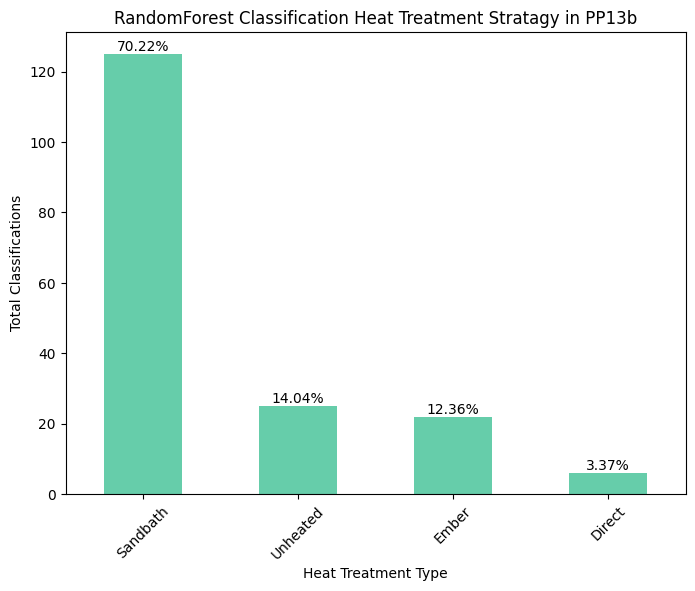

In [17]:
import matplotlib.pyplot as plt

# Calculate value counts
label_counts = groupSC2['Assemblage'].value_counts()

# Create a bar graph
plt.figure(figsize=(8, 6))
ax = label_counts.plot(kind='bar', color='mediumaquamarine')

# Add labels and title
plt.xlabel('Heat Treatment Type')
plt.xticks(rotation=45)
plt.ylabel('Total Classifications')
plt.title('RandomForest Classification Heat Treatment Stratagy in PP13b')

#Add percentage
total_count = label_counts.sum()
for i, v in enumerate(label_counts):
    percentage = (v / total_count) * 100
    ax.text(i, v, f'{percentage:.2f}%', ha='center', va='bottom')
# Show the plot
print(label_counts)


Sandbath    2854
Ember        490
Unheated     276
Direct        43
Name: Assemblage, dtype: int64


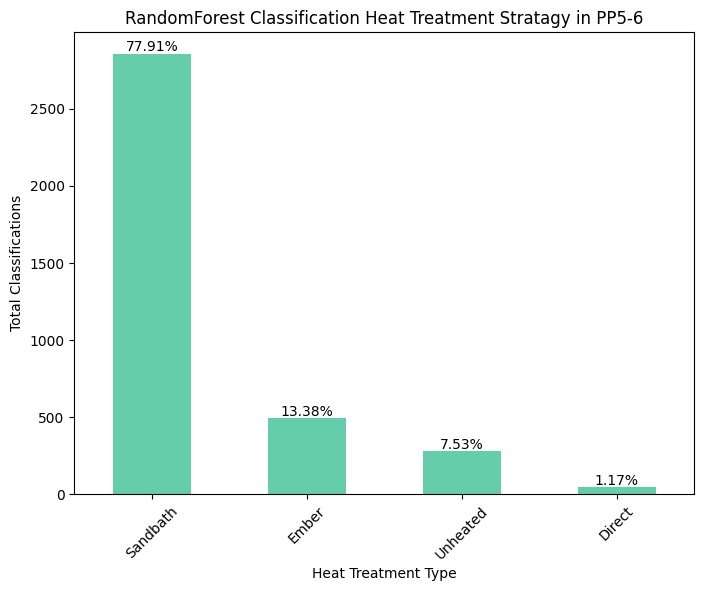

In [18]:
import matplotlib.pyplot as plt

# Calculate value counts
label_counts = groupSC3['Assemblage'].value_counts()

# Create a bar graph
plt.figure(figsize=(8, 6))
ax = label_counts.plot(kind='bar', color='mediumaquamarine')

# Add labels and title
plt.xlabel('Heat Treatment Type')
plt.xticks(rotation=45)
plt.ylabel('Total Classifications')
plt.title('RandomForest Classification Heat Treatment Stratagy in PP5-6')

#Add percentage
total_count = label_counts.sum()
for i, v in enumerate(label_counts):
    percentage = (v / total_count) * 100
    ax.text(i, v, f'{percentage:.2f}%', ha='center', va='bottom')
# Show the plot
print(label_counts)

Accuracy:  0.9964838255977496
Precision:  0.99650488053429
Recall:  0.9964838255977496
F1-Score:  0.9964838255977496
Confusion Matrix:
 [[130   0   2   0]
 [  0 177   1   0]
 [  0   0 830   0]
 [  0   0   2 280]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


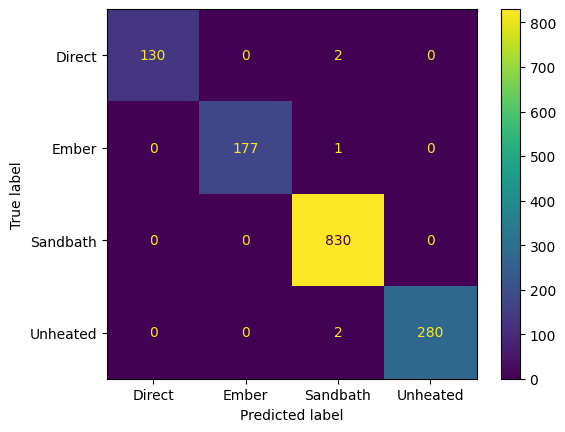

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions on the training dataset
y_pred = rf_model.predict(X_train)

# Calculate various performance metrics
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred,pos_label='positive',
                                           average='weighted')
recall = recall_score(y_train, y_pred,pos_label='positive'
                                           ,average='weighted')
f1 = f1_score(y_train, y_pred,pos_label='positive',
                                           average='micro')
conf_matrix = confusion_matrix(y_train, y_pred)



print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)
print("Confusion Matrix:\n", conf_matrix)


disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=np.unique(y_train))
disp.plot()



In [20]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42069)
fold = 1
auc = []
for train_idx, val_idx in skf.split(X, y):
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]

    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]

    clf = RandomForestClassifier(n_estimators=26, random_state=42069)
    clf.fit(X_tr, y_tr)
    pred = clf.predict(X_val)
    pred_prob = clf.predict_proba(X_val)

    acc_score = accuracy_score(y_val, pred)

    # For ROC AUC in multi-class, you need to use a one-vs-one or one-vs-all approach
    # Here, I'm using the one-vs-all approach for simplicity
    auc_score = roc_auc_score(y_val, pred_prob, multi_class='ovr')

    # Do something with acc_score and auc_score for each fold
    print(f"========Fold {fold} =========")
    print(f"Our accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}")

    fold += 1
    auc.append(auc_score)

oof_auc = np.mean(auc)
print(f'Our out of fold AUC score is {oof_auc:0.4f}')


========Fold 1 =========
Our accuracy on the validation set is 0.6854 and AUC is 0.8612
========Fold 2 =========
Our accuracy on the validation set is 0.7472 and AUC is 0.8262
========Fold 3 =========
Our accuracy on the validation set is 0.7191 and AUC is 0.8480
========Fold 4 =========
Our accuracy on the validation set is 0.7360 and AUC is 0.8369
========Fold 5 =========
Our accuracy on the validation set is 0.7191 and AUC is 0.8327
========Fold 6 =========
Our accuracy on the validation set is 0.7191 and AUC is 0.8613
========Fold 7 =========
Our accuracy on the validation set is 0.6966 and AUC is 0.8560
========Fold 8 =========
Our accuracy on the validation set is 0.7191 and AUC is 0.8483
========Fold 9 =========
Our accuracy on the validation set is 0.7401 and AUC is 0.8777
========Fold 10 =========
Our accuracy on the validation set is 0.7062 and AUC is 0.8688
Our out of fold AUC score is 0.8517


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

skf = StratifiedKFold(n_splits=100, shuffle=True)
fold = 1
auc = []

for train_idx, val_idx in skf.split(X, y):
    # Index for current fold samples
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]

    # Index for current validation samples
    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]

    # Fit an SVM model to the current fold samples
    clf = SVC(probability=True, gamma=0.1, decision_function_shape='ovr', C=100)
    clf.fit(X_tr, y_tr)

    # Create a OneVsRestClassifier
    svm_ovr = OneVsRestClassifier(clf)
    svm_ovr.fit(X_tr, y_tr)

    pred = svm_ovr.predict(X_val)
    pred_prob = svm_ovr.predict_proba(X_val)

    # Calculate accuracy and AUC scores
    acc_score = accuracy_score(y_val, pred)
    auc_score = roc_auc_score(y_val, pred_prob, multi_class='ovr')

    auc.append(auc_score)

    print(f"========Fold {fold} =========")
    print(f"Our accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}")

    fold += 1

# Calculate and print the mean AUC across all folds
mean_auc = np.mean(auc)
print(f"\nMean AUC across all folds: {mean_auc:0.4f}")






========Fold 1 =========
Our accuracy on the validation set is 0.6404 and AUC is 0.7921
========Fold 2 =========
Our accuracy on the validation set is 0.6854 and AUC is 0.7773
========Fold 3 =========
Our accuracy on the validation set is 0.7247 and AUC is 0.8377
========Fold 4 =========
Our accuracy on the validation set is 0.6404 and AUC is 0.7809
========Fold 5 =========
Our accuracy on the validation set is 0.6461 and AUC is 0.7781
========Fold 6 =========
Our accuracy on the validation set is 0.6910 and AUC is 0.8189
========Fold 7 =========
Our accuracy on the validation set is 0.6348 and AUC is 0.7802
========Fold 8 =========
Our accuracy on the validation set is 0.7135 and AUC is 0.8252
========Fold 9 =========
Our accuracy on the validation set is 0.6667 and AUC is 0.7949
========Fold 10 =========
Our accuracy on the validation set is 0.6949 and AUC is 0.8348

Mean AUC across all folds: 0.8020


In [ ]:
np.mean(auc)

0.7883938568810637

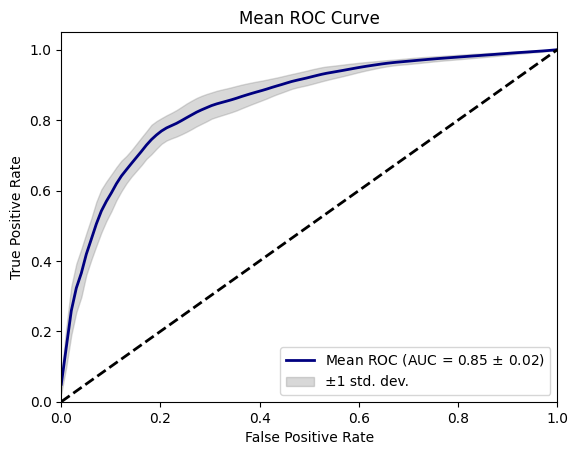

In [21]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold = 0

mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
all_auc = []

for train_idx, val_idx in skf.split(X, y):
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]

    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]

    clf = RandomForestClassifier(n_estimators=30, random_state=42069)
    clf.fit(X_tr, y_tr)
    pred_prob = clf.predict_proba(X_val)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(clf.classes_)):
        fpr[i], tpr[i], _ = roc_curve((y_val == clf.classes_[i]).astype(int), pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Interpolate the average tpr at the mean_fpr
    interp_tpr = np.zeros_like(mean_fpr)
    for i in range(len(clf.classes_)):
        interp_tpr += np.interp(mean_fpr, fpr[i], tpr[i])

    interp_tpr /= len(clf.classes_)
    all_tpr.append(interp_tpr)
    all_auc.append(np.mean(list(roc_auc.values())))

    fold += 1

# Calculate the mean and standard deviation of the averaged tpr
mean_tpr = np.mean(all_tpr, axis=0)
std_tpr = np.std(all_tpr, axis=0)

# Plot the averaged ROC curve
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='navy', label=f'Mean ROC (AUC = {np.mean(all_auc):.2f} $\pm$ {np.std(all_auc):.2f})', lw=2)
plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr, color='grey', alpha=0.3, label='±1 std. dev.')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curve')
plt.legend(loc="lower right")
plt.show()


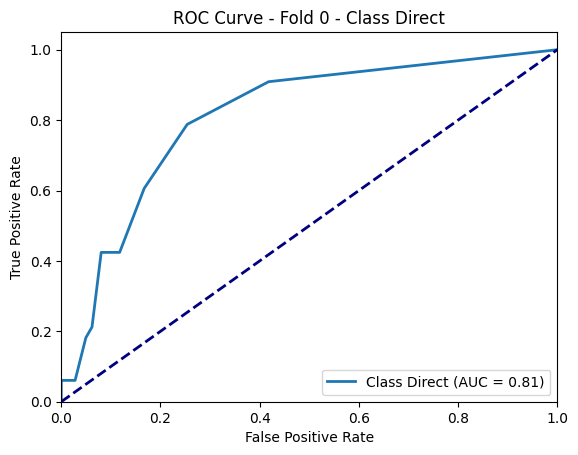

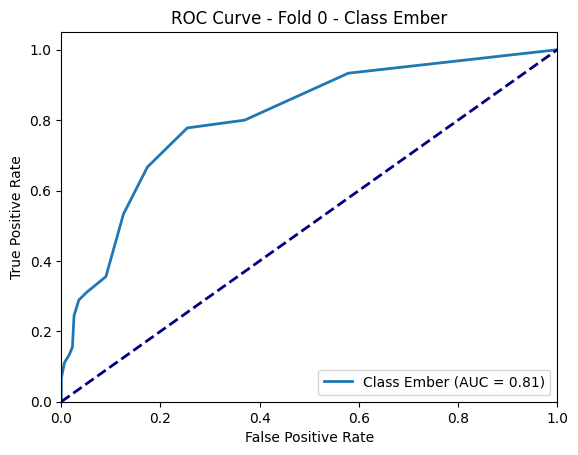

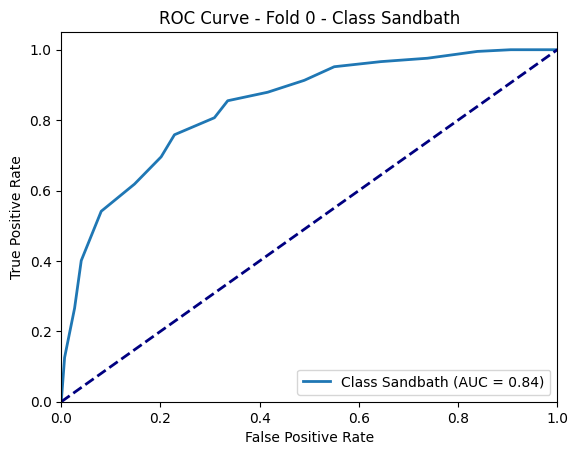

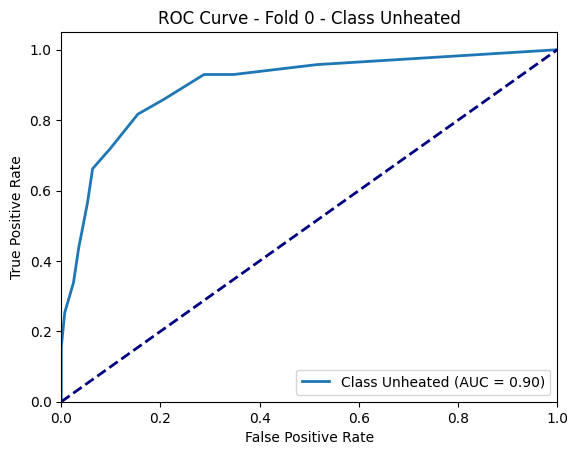

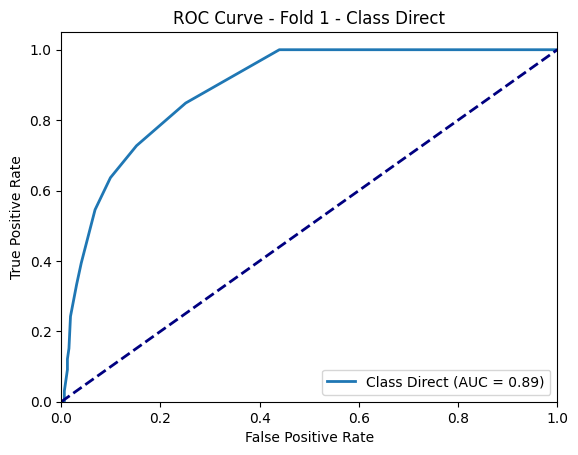

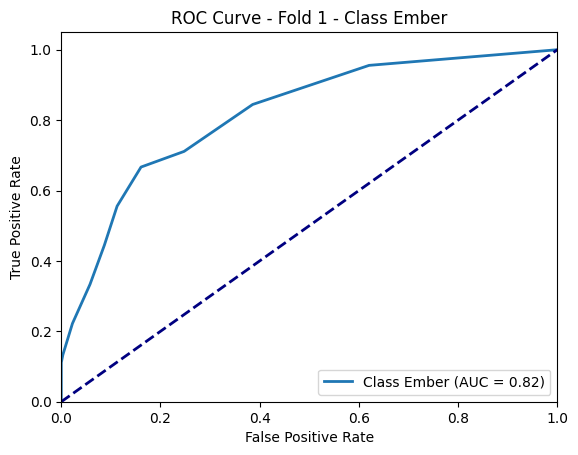

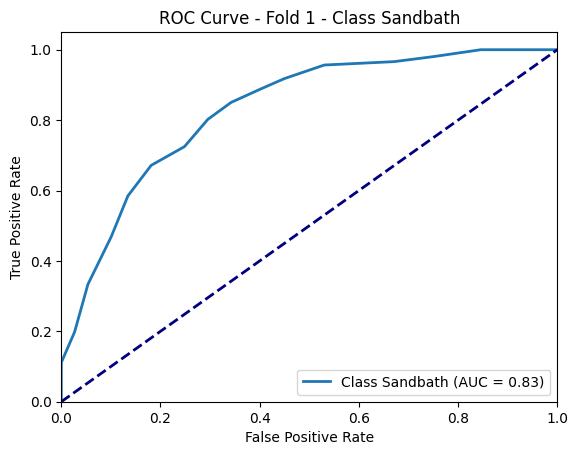

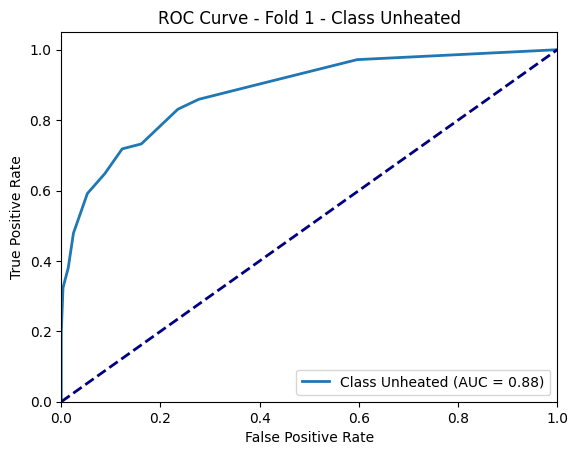

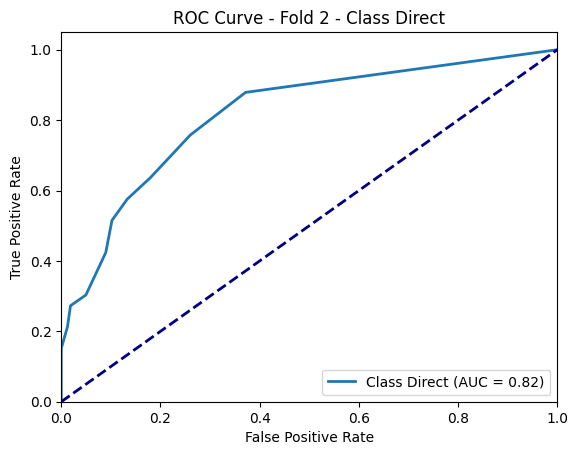

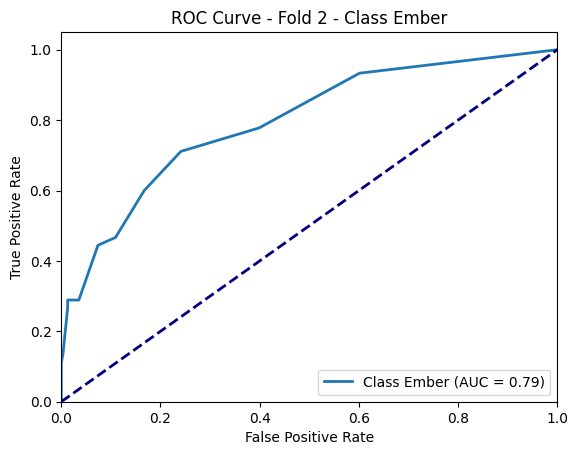

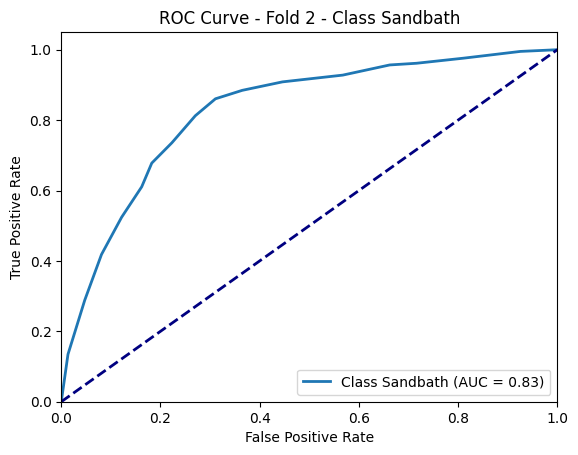

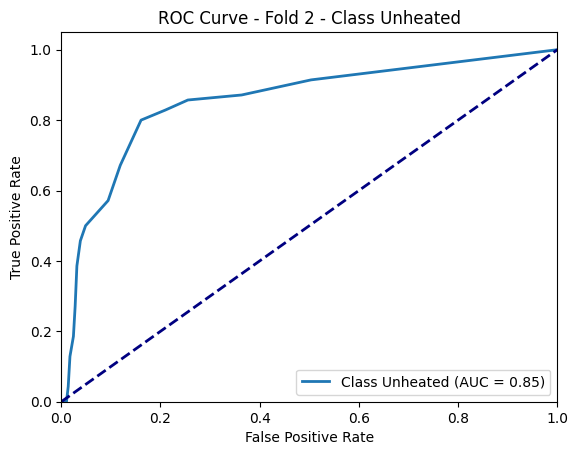

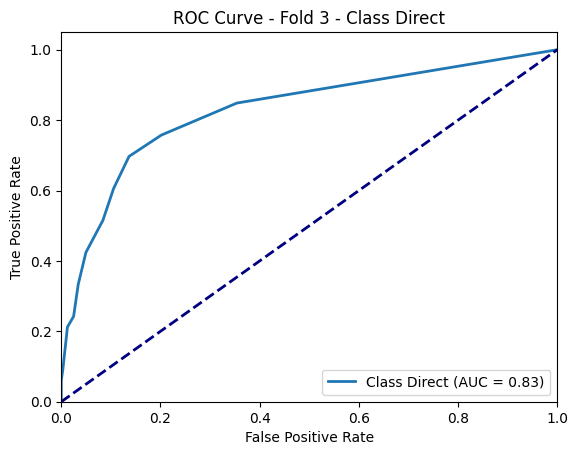

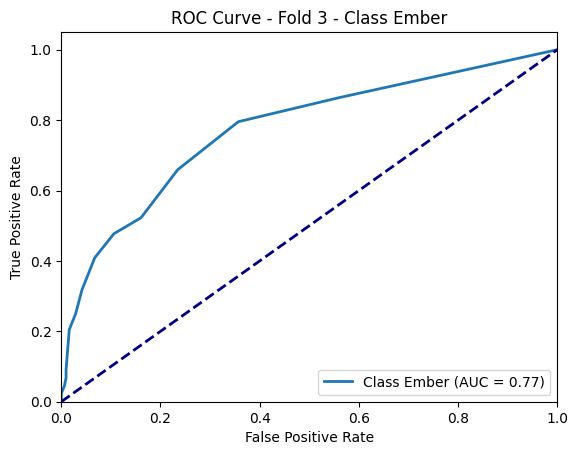

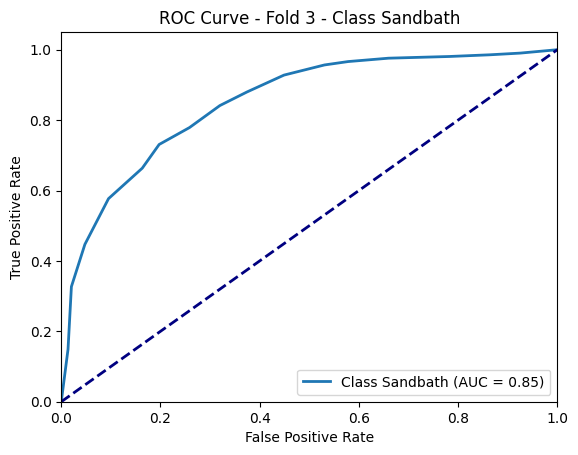

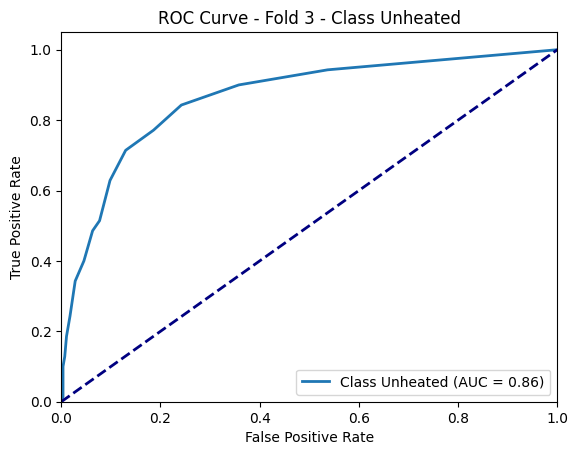

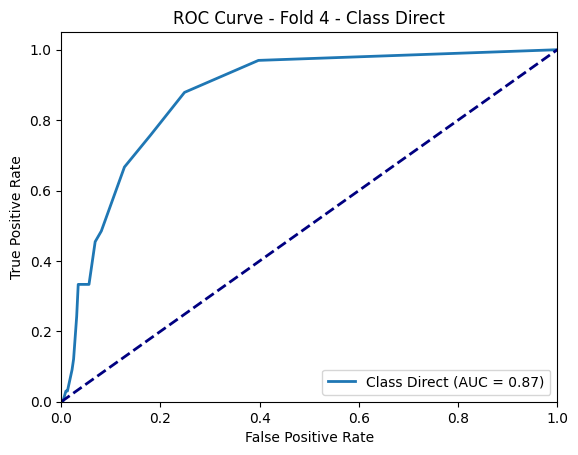

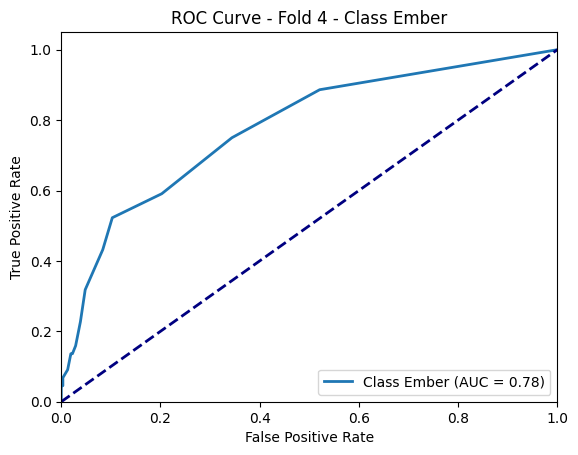

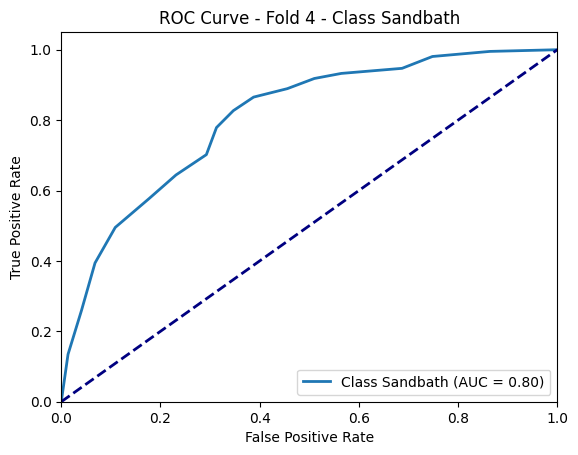

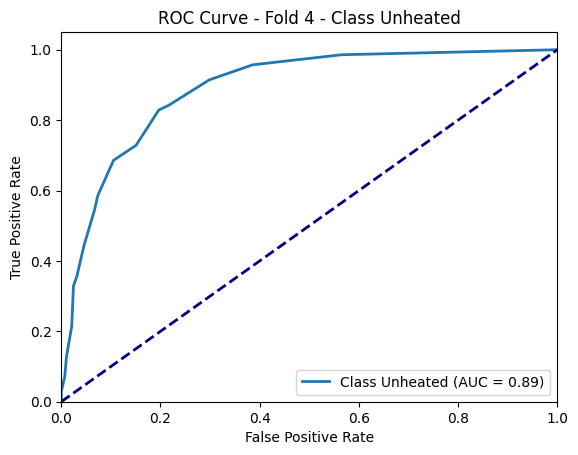

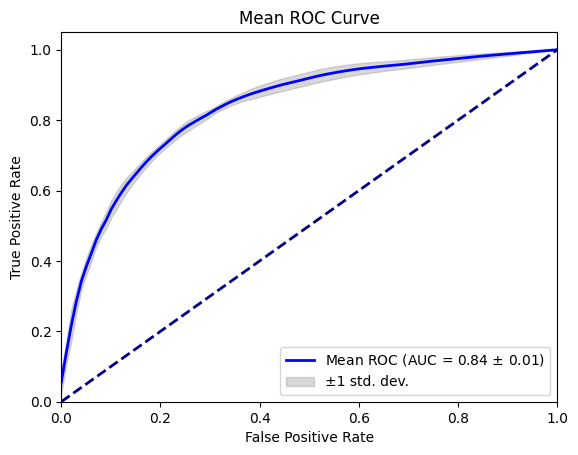

In [22]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold = 0

mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
all_auc = []

for train_idx, val_idx in skf.split(X, y):
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]

    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]

    clf = RandomForestClassifier(n_estimators=16)
    clf.fit(X_tr, y_tr)
    pred_prob = clf.predict_proba(X_val)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(clf.classes_)):
        fpr[i], tpr[i], _ = roc_curve((y_val == clf.classes_[i]).astype(int), pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot individual class ROC curves
        plt.figure()
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {clf.classes_[i]} (AUC = {roc_auc[i]:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - Fold {fold} - Class {clf.classes_[i]}')
        plt.legend(loc="lower right")
        plt.show()

    # Interpolate the average tpr at the mean_fpr
    interp_tpr = np.zeros_like(mean_fpr)
    for i in range(len(clf.classes_)):
        interp_tpr += np.interp(mean_fpr, fpr[i], tpr[i])

    interp_tpr /= len(clf.classes_)
    all_tpr.append(interp_tpr)
    all_auc.append(np.mean(list(roc_auc.values())))

    fold += 1

# Calculate the mean and standard deviation of the averaged tpr
mean_tpr = np.mean(all_tpr, axis=0)
std_tpr = np.std(all_tpr, axis=0)

# Plot the averaged ROC curve
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {np.mean(all_auc):.2f} $\pm$ {np.std(all_auc):.2f})', lw=2)
plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr, color='grey', alpha=0.3, label='±1 std. dev.')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curve')
plt.legend(loc="lower right")
plt.show()


{0: 'Direct', 1: 'Ember', 2: 'Sandbath', 3: 'Unheated'}


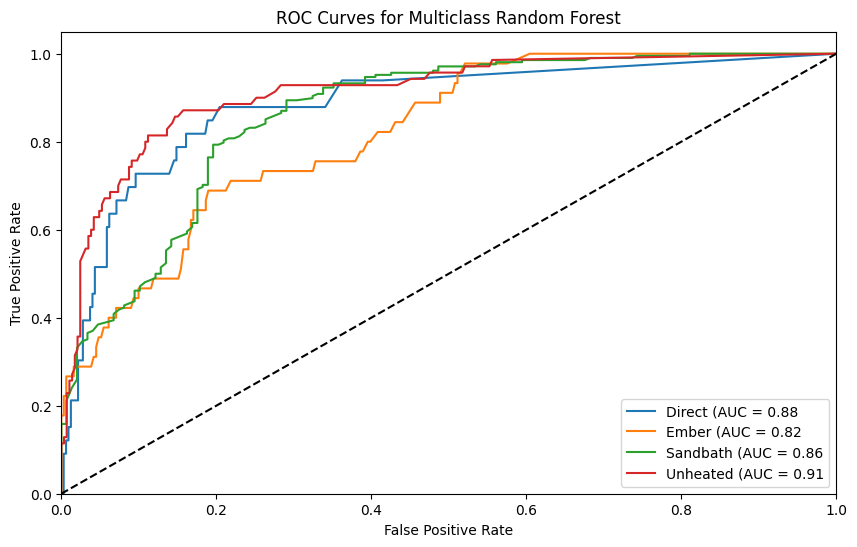

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split

# Train your multiclass classifier (e.g., Random Forest)
rf_model = RandomForestClassifier(n_estimators=26, random_state=42069)  # You can adjust hyperparameters as needed
rf_model.fit(X_train, y_train)

# Binarize the labels for multiclass ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Create a OneVsRestClassifier
rf_ovr = OneVsRestClassifier(rf_model)
rf_ovr.fit(X_train, y_train)

# Get predicted probabilities for each class
y_scores = rf_ovr.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y_train))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Get unique class labels from y_train
unique_classes = np.unique(y_train)

# Create class_names dictionary based on the order of unique classes
class_names = {i: class_name for i, class_name in enumerate(unique_classes)}

# Print the class_names dictionary for verification
print(class_names)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
for i in range(len(np.unique(y_train))):
    plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Random Forest')
plt.legend(loc="lower right")
plt.show()

